In [ ]:
!pip install multion -q

In [7]:
!pip uninstall multion --yes

Found existing installation: multion 0.1.0
Uninstalling multion-0.1.0:
  Successfully uninstalled multion-0.1.0


In [1]:
import multion


In [2]:
multion.login()

Already logged in


running new session
Server Disconnected. Please press connect in the Multion extention popup
{'url': 'https://www.google.com/search?q=weather+today&sxsrf=AB5stBg0qYtB8uFJ1Un4qXA8s6wVpeqqFw%3A1690006361908&source=hp&ei=WXO7ZLTzM-rx0PEPocGL0A8&iflsig=AD69kcEAAAAAZLuBaXMVENgVSXCBLR21cAG5R6CwEhpf&ved=0ahUKEwj0g_em1KGAAxXqODQIHaHgAvoQ4dUDCAs&uact=5&oq=weather+today&gs_lp=Egdnd3Mtd2l6Ig13ZWF0aGVyIHRvZGF5MgoQIxiKBRgnGJ0CMgcQIxiKBRgnMgcQIxiKBRgnMgoQABiKBRixAxhDMgcQABiKBRhDMgsQABiABBixAxiDATIFEAAYgAQyBRAAGIAEMgsQABiABBixAxiDATILEAAYgAQYsQMYgwFI2wFQAFgbcAF4AJABAJgBRqABRqoBATG4AQPIAQD4AQE&sclient=gws-wiz', 'screenshot': '', 'tabId': '1371659711', 'message': 'I am typing "weather today" into the Google search bar and then submitting the search to find the current weather.\n\n', 'status': 'CONTINUE'}

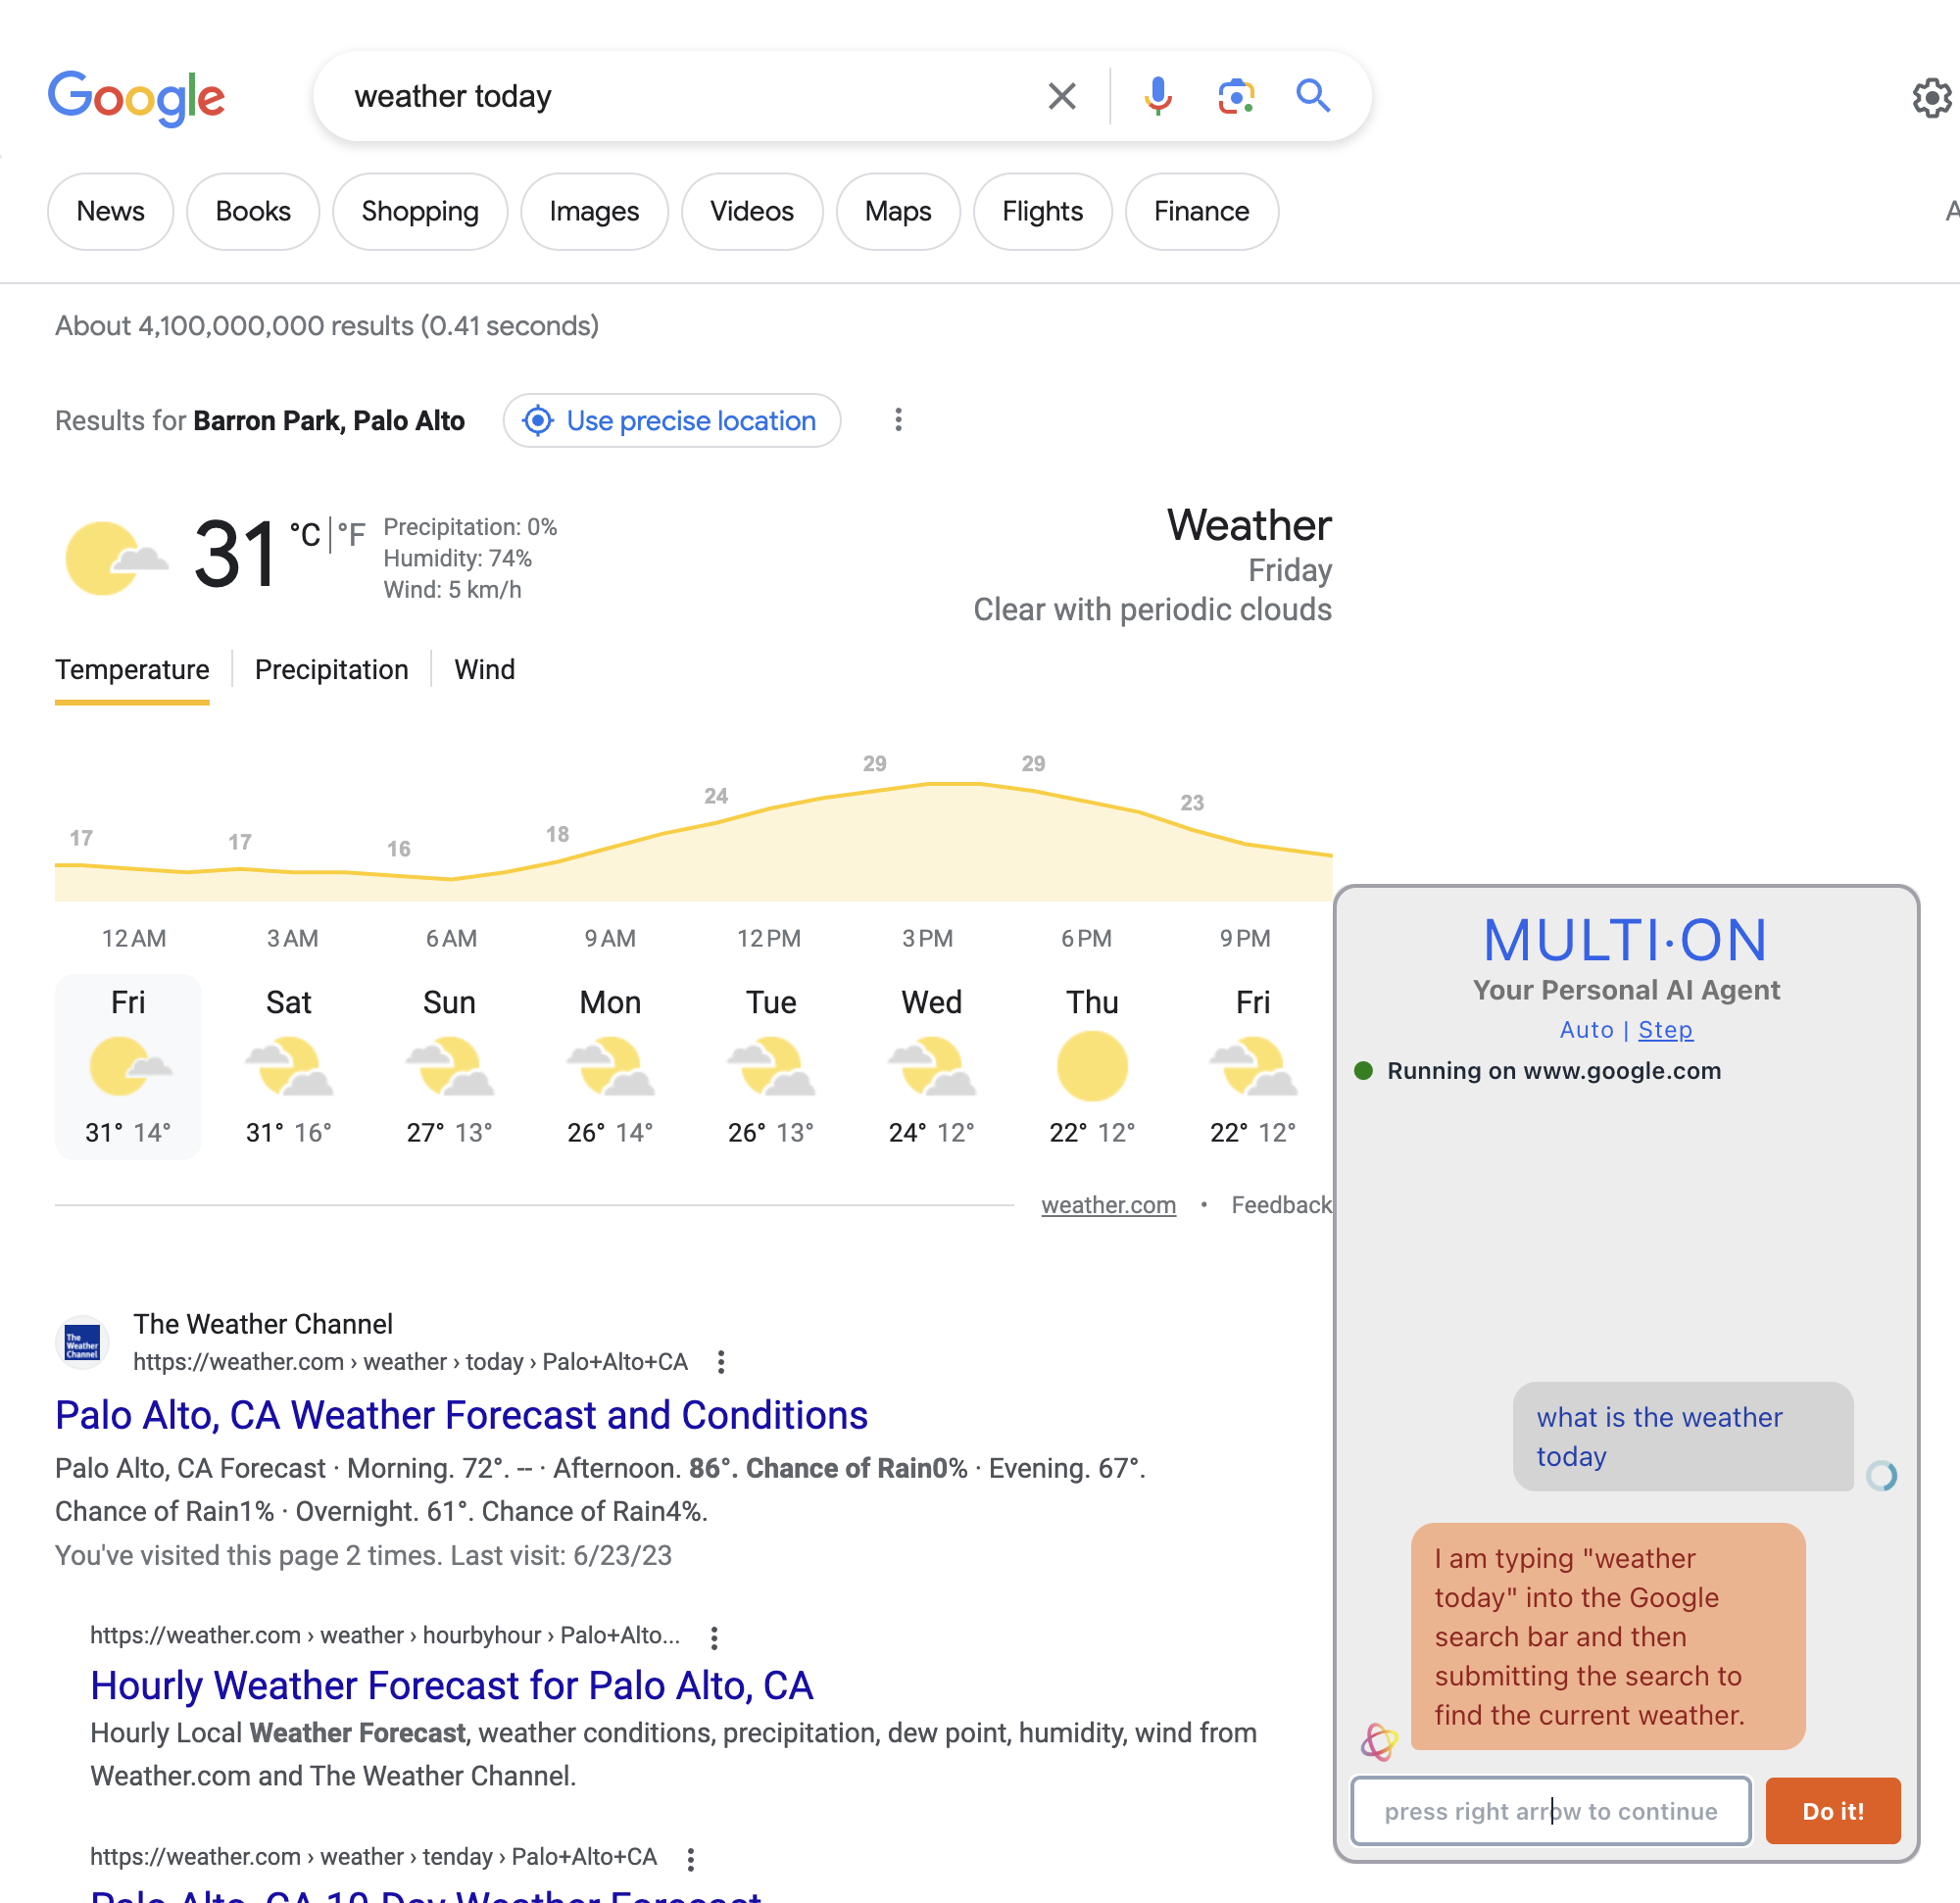

'1371659711'

In [3]:
response = multion.new_session({"input": "what is the weather today","url": "https://www.google.com"})
print(response)
tabId = response['tabId']
tabId

session updated


{'url': 'https://www.google.com',
 'screenshot': '',
 'tabId': '1371659711',
 'message': 'The weather today in Barron Park, Palo Alto is clear with periodic clouds. The temperature is 31 degrees Celsius, with 0% precipitation, 74% humidity, and a wind speed of 5 km/h.\n\n',
 'status': 'DONE'}
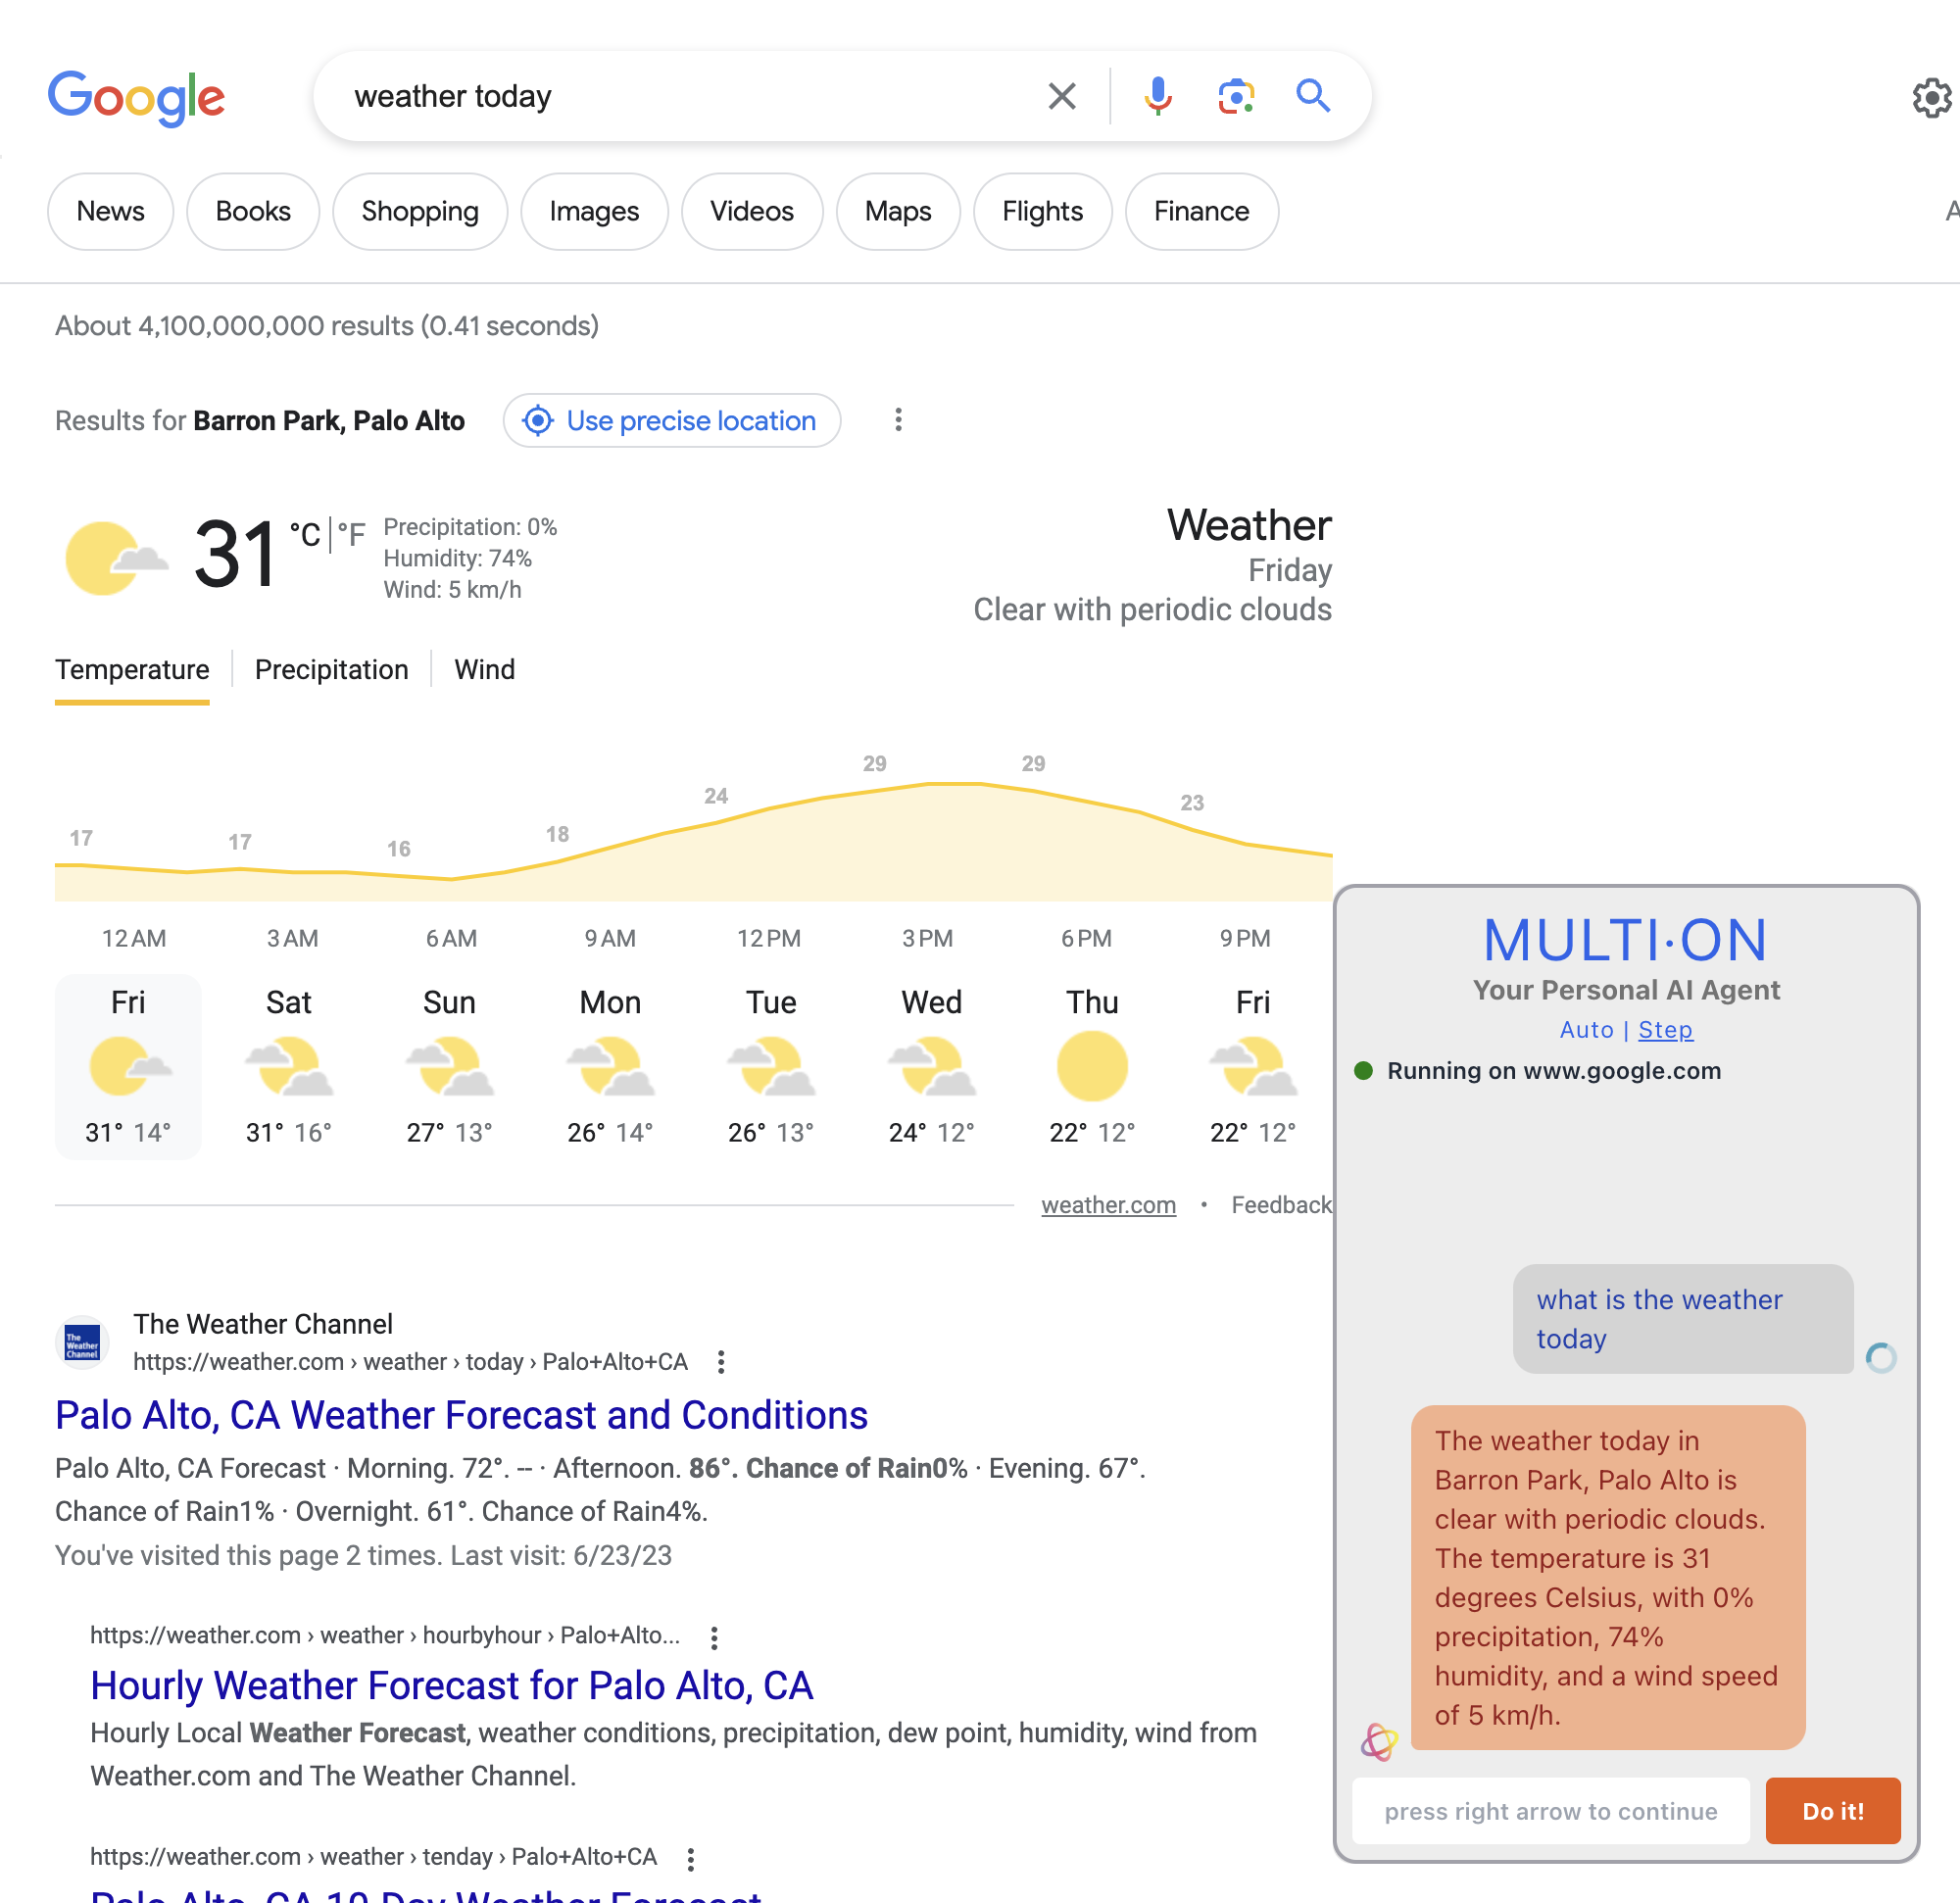

In [4]:
response = multion.update_session(tabId, {"input": "what is the weather today","url": "https://www.google.com"})
response

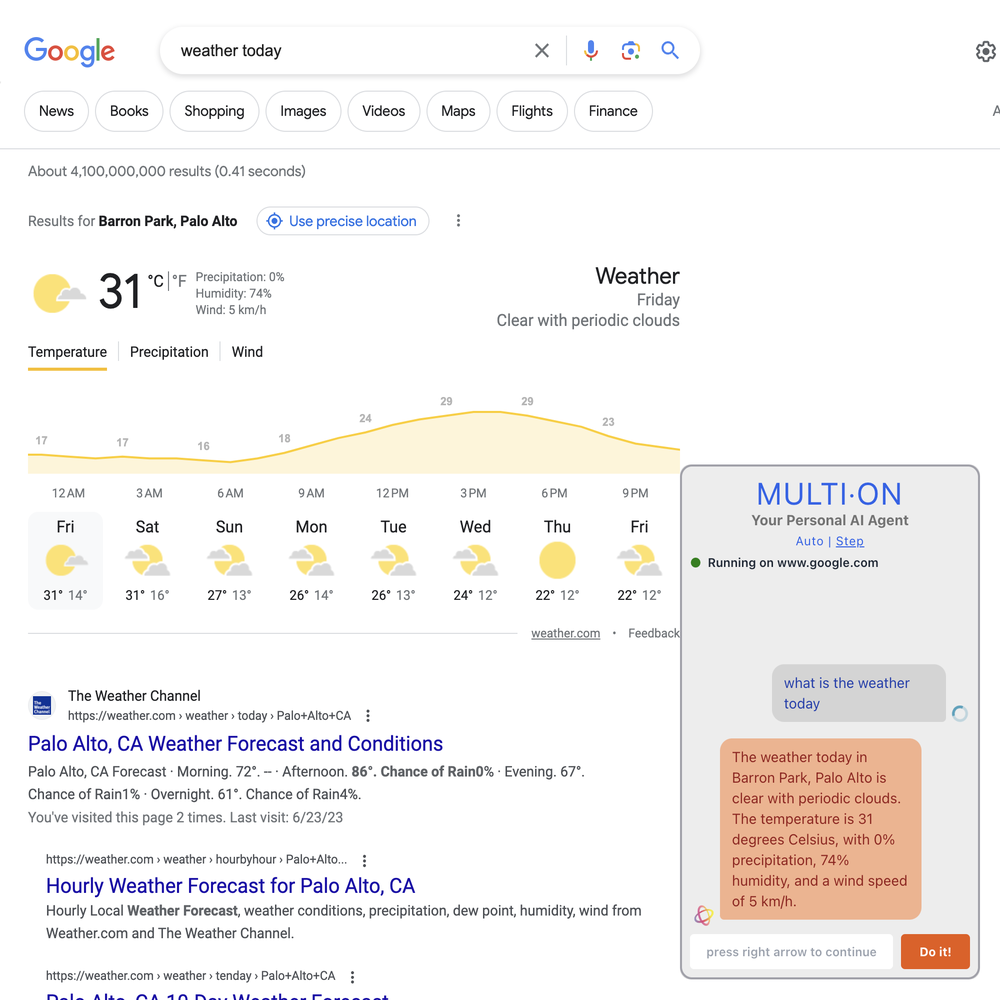

In [22]:
multion.get_screenshot(response, height=1000, width=1000)